In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("/Desktop"))


In [32]:
from glob import glob
train_fns = sorted(glob(r'Desktop/siim/dicom-images-train/*/*/*.dcm'))
test_fns = sorted(glob(r'Desktop/siim/dicom-images-test/*/*/*.dcm'))


In [33]:
x=train_fns.shape[0]
print(len(test_fns))

AttributeError: 'list' object has no attribute 'shape'

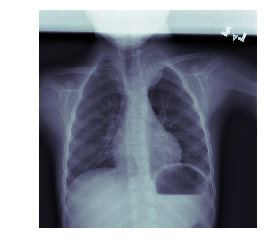

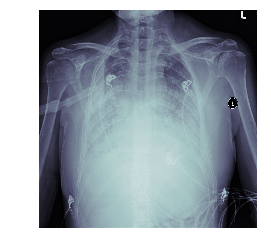

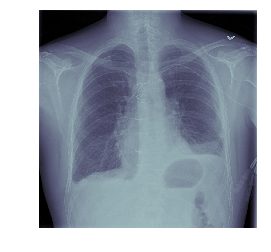

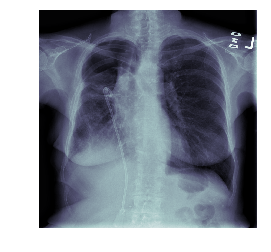

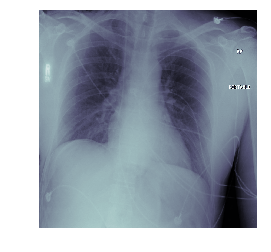

In [5]:
from matplotlib import pyplot as plt
import pydicom

for k in range(5):
    fn = np.random.choice(train_fns)
    img = pydicom.read_file(fn).pixel_array
    plt.imshow(img, cmap='bone')
    plt.axis('off')
    plt.show()

In [6]:
import pandas as pd
from collections import defaultdict
rles = pd.read_csv(r'Desktop/siim/train-rle.csv')
# images can have multiple annotations
rles_ = defaultdict(list)
for image_id, rle in zip(rles['ImageId'], rles[' EncodedPixels']):
    rles_[image_id].append(rle)
rles = rles_
annotated = {k: v for k, v in rles.items() if v[0] != ' -1'}
print("%d of %d images are annotated" % (len(annotated), len(rles)))

2379 of 10675 images are annotated


In [7]:
print("Missing: ", len(train_fns) - len(rles))

Missing:  37


In [34]:
rles.shape


AttributeError: 'collections.defaultdict' object has no attribute 'shape'

In [9]:
means = []
from tqdm import tqdm_notebook as tqdm
for fn in tqdm(test_fns):
    img = pydicom.read_file(fn).pixel_array
    means.append(img.mean())
print("Test mean: ", np.mean(means))

KeyboardInterrupt: 

In [10]:
import cv2
#from mask_functions import rle2mask
#import numpy as np

def mask2rle(img, width, height):
    rle = []
    lastColor = 0;
    currentPixel = 0;
    runStart = -1;
    runLength = 0;

    for x in range(width):
        for y in range(height):
            currentColor = img[x][y]
            if currentColor != lastColor:
                if currentColor == 255:
                    runStart = currentPixel;
                    runLength = 1;
                else:
                    rle.append(str(runStart));
                    rle.append(str(runLength));
                    runStart = -1;
                    runLength = 0;
                    currentPixel = 0;
            elif runStart > -1:
                runLength += 1
            lastColor = currentColor;
            currentPixel+=1;

    return " ".join(rle)

def rle2mask(rle, width, height):
    mask= np.zeros(width* height)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        current_position += start
        mask[current_position:current_position+lengths[index]] = 255
        current_position += lengths[index]

    return mask.reshape(width, height)


In [11]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

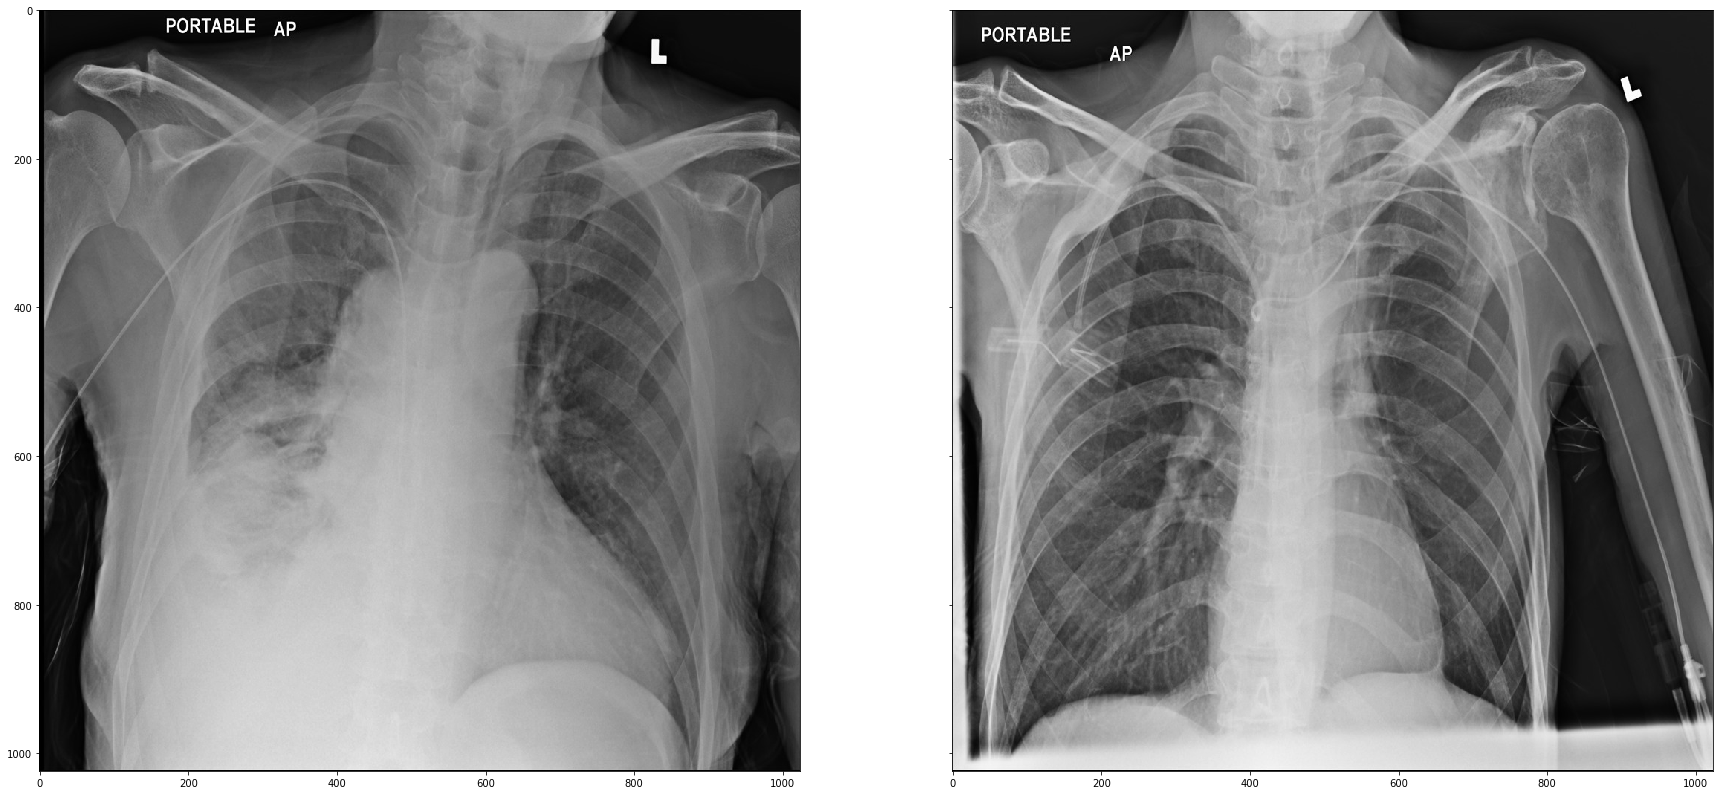

In [30]:
import gdcm
import glob
start = 455  # Starting index of images
num_img = 2 # Total number of images to show

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(30,20))
for q, file_path in enumerate(glob.glob(r'Desktop/siim/dicom-images-train/*/*/*.dcm')[start:start+num_img]):
    dataset = pydicom.dcmread(file_path,force=True)
    
    #dataset.file_meta.TransferSyntaxUID = pydicom.uid.JPEG2000
    ax[q].imshow(dataset.pixel_array, cmap=plt.cm.gray)
    

In [ ]:
means = []
for fn in tqdm(train_fns):
    img = pydicom.read_file(fn).pixel_array
    means.append(img.mean())
print("Train mean: ", np.mean(means))


In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
start = 5   # Starting index of images
num_img = 4 # Total number of images to show


In [ ]:
train_rle = pd.read_csv(r'Desktop/siim/train-rle.csv')
train_rle.head()
if list(line[" EncodedPixels"].values) == [] and line[" EncodedPixels"].values[0][1:] == "-1":
  #assume here that the RLE is -1
else:
  #assume that the RLE got a mask and need to be decoded
#tr_rle = pd.read_csv(r'Desktop/siim/train-rle.csv')
#print(tr_rle.shape)
#tr_rle.head()
#tr_rle.reset_index()

In [ ]:
df_mask = pd.read_csv(r'Desktop/siim/train-rle.csv')
#len(df_mask),len(set(df_mask.index.values))
#df_mask_dist = df_mask.copy(deep=True)
#df_mask_dist.reset_index(inplace=True)

#df = pd.DataFrame(df_mask_dist.ImageId.value_counts()).reset_index()
#df.columns = ['ImageId','counts']

#df_mask_dist = pd.merge(df_mask_dist,df,on='ImageId')
df_mask.head()
df_mask['index_col'] = df_mask.index
df_mask.head()
cols = df_mask.columns.tolist()
cols
cols = cols[-1:] + cols[:-1]
df_mask = df_mask.reindex(columns=cols)
df_mask

In [ ]:
df_mask_dist.counts.plot.hist()
plt.xlabel('Number of Annotations')

In [ ]:
def get_image_data(im_path,im_type,df_mask=df_mask):
    if im_type=='train':
        return pydicom.dcmread(im_path).pixel_array

In [ ]:
train_fn_id = [val.split('/')[-1][:-4] for val in train_fns]
print(len(set(train_fn_id).intersection(set(df_mask_dist.ImageId))))

In [ ]:
masks_count_gt_one = set(df_mask_dist[df_mask_dist.counts>4].ImageId.values)
print('Number of masks with annotations greater than 5:',(df_mask_dist.counts>5).sum())
common_masks =  list(set(train_fn_id).intersection(masks_count_gt_one))
print(len(common_masks))

In [ ]:
df_mask_dist.shape

In [ ]:
x=set(train_fn_id).intersection(set(df_mask_dist.ImageId))

In [ ]:
len(x)

In [ ]:
x

In [ ]:
train_fn_id.shape

In [ ]:
train_fns

In [ ]:
fn = np.random.choice(train_fns)
    #img = pydicom.read_file(fn).pixel_array
    
    # get id of the image
image_id = fn.split('/')[-1][:-4]

In [ ]:
image_id[4]

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
    
for im in range(9):
    i = im // 3
    j = im % 3

    # choose random images from train set
    fn = np.random.choice(train_fns)
    img = pydicom.read_file(fn).pixel_array

    #plot the data
    axs[i,j].imshow(img, cmap='bone')
    axs[i,j].axis('off')
        
# set suptitle
plt.suptitle('Pneumothorax images samples (training)')
plt.show()

In [ ]:
tr_rle = pd.read_csv(r'Desktop/siim/train-rle.csv')
#print(tr_rle.shape)

tr_rle.head()
#tr_rle['index']=tr_rle.index
tr_rle.head()
tr_rle.set_index(["Image_ID"], inplace = True, 
                            append = True, drop = False) 

In [ ]:
train_glob = r'Desktop/siim/dicom-images-train/*/*/*.dcm'
test_glob = r'Desktop/siim/dicom-images-test/*/*/*.dcm'
train_fns = sorted(glob.glob(train_glob))
test_fns = sorted(glob.glob(test_glob))
df_mask = pd.read_csv(r'Desktop/siim/train-rle.csv', index_col='ImageId')

In [ ]:
df_mask.apply(lambda x: ''.join(x.split(' ')) if ''.join(x.split(' '))=='-1' else ' '.join(x.split(' ')))
len(df_mask),len(set(df_mask.index.values))

In [ ]:
df_mask_dist = df_mask.copy(deep=True)
df_mask_dist.reset_index(inplace=True)

df = pd.DataFrame(df_mask_dist.ImageId.value_counts()).reset_index()
df.columns = ['ImageId','counts']

df_mask_dist = pd.merge(df_mask_dist,df,on='ImageId')
len(df_mask_dist)

In [ ]:
def get_image_data(im_path,im_type,df_mask=df_mask):
    if im_type=='train':
        return pydicom.dcmread(im_path).pixel_array


In [ ]:
train_fn_id = [val.split('/')[-1][:-4] for val in train_fns]
print(len(set(train_fn_id).intersection(set(df_mask_dist.ImageId))))
df_mask

In [ ]:
num_img = 5 * 3
fig, ax = plt.subplots(nrows=num_img // 5, ncols=5, sharey=True, figsize=(20, num_img // 5 * 4))
axes = ax.ravel()
for q, fp in enumerate(glob.glob(r'Desktop/siim/dicom-images-train/*/*/*.dcm')[:num_img]):
    dataset = pydicom.dcmread(fp)
    axes[q].imshow(dataset.pixel_array, cmap=plt.cm.bone)
    axes[q].grid(False)
    flag = (df_mask.loc[:,'ImageId'] == fp.split('//')[-1][:-4])
    if df_mask.loc[flag, ' EncodedPixels'].values[0] != ' -1' :
        mask = rle2mask(df_mask.loc[flag, ' EncodedPixels'].values[2], 1024, 1024).T
        axes[q].set_title('Pneumothorax', fontsize=10)
        mask[mask == 0] = np.nan
        axes[q].imshow(mask, alpha = 0.2, vmin = 0, vmax = 1)
    else:
        axes[q].set_title('No Diseases', fontsize=10)

In [ ]:
tr_Rle